We define the reference temperature (43°C) and the rate factors R for temperatures above and below 43°C. We also create a function to calculate the CEM43 increment based on the temperature and time step.  
First, let's define the basic parameters and a function to calculate CEM43 over time:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the reference temperature and rate factors
T_ref = 43  # Reference temperature in Celsius
R_above = 0.5  # R value for temperatures >= T_ref
R_below = 0.25  # R value for temperatures < T_ref

# Function to calculate CEM43 increment
def calculate_CEM43_increment(T, dt):
    return (dt / 60) * np.where(T >= 43, R_above ** (43 - T), R_below ** (43 - T))

# Define the time steps (in seconds) and temperatures for the simulation
time_steps = np.arange(0, 3600 + 600, 600)  # Every 10 minutes for 1 hour
temperatures = np.array([37, 39, 41, 43, 45, 47, 49])  # Different temperatures to compare

# Initialize the CEM43 array
cem43 = np.zeros((len(time_steps), len(temperatures)))

Next, we will calculate the CEM43 values for each temperature over the given time steps. We loop over the defined time steps and temperatures to calculate the cumulative CEM43 values. The calculation uses the given formula to incrementally build up the CEM43 value.

In [3]:
for t in range(1, len(time_steps)):
    dt = time_steps[t] - time_steps[t - 1]  # Time step in seconds
    for temp_idx in range(len(temperatures)):
        T = temperatures[temp_idx]
        cem43[t, temp_idx] = cem43[t - 1, temp_idx] + calculate_CEM43_increment(T, dt)

We plot the CEM43 values over time, showing how the thermal dose accumulates at different temperatures.

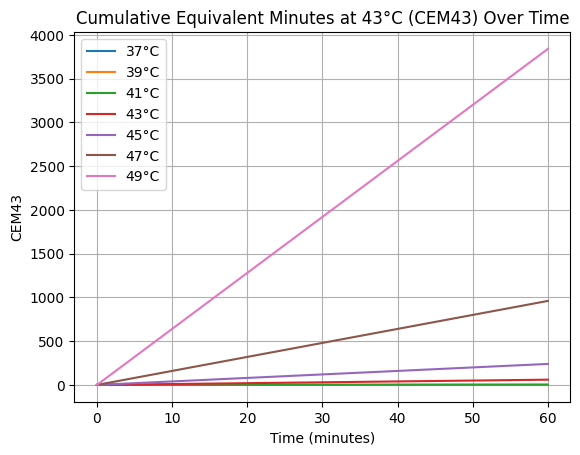

In [4]:
plt.figure()
for temp_idx in range(len(temperatures)):
    plt.plot(time_steps / 60, cem43[:, temp_idx], label=f'{temperatures[temp_idx]}°C')
plt.xlabel('Time (minutes)')
plt.ylabel('CEM43')
plt.title('Cumulative Equivalent Minutes at 43°C (CEM43) Over Time')
plt.legend()
plt.grid(True)
plt.show()
